# Decision Tree

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
vinos = pd.read_csv('WINE.csv')

In [3]:
vinos.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,One
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,One
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,One
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,One
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,One


In [4]:
labels = vinos['Wine Type'].unique()
labels

array(['One', 'Two', 'Three'], dtype=object)

In [5]:
Y = vinos['Wine Type']
X = vinos.drop('Wine Type', axis=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state= 45)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
predicciones = arbol.predict(X_test)
predicciones

array(['Three', 'Three', 'One', 'Two', 'Two', 'Two', 'Three', 'One',
       'One', 'Two', 'Two', 'One', 'One', 'Three', 'Three', 'Two', 'Two',
       'Three', 'Three', 'Three', 'Two', 'Two', 'One', 'Three', 'Three',
       'Three', 'One', 'Two', 'Three', 'Three', 'Three', 'Three', 'Three',
       'One', 'Two', 'Three', 'One', 'One', 'Two', 'One', 'Two', 'Two',
       'Two', 'Two', 'Two', 'Three', 'Three', 'Three', 'One', 'Two',
       'One', 'One', 'Three', 'One'], dtype=object)

Text(83.40000000000006, 0.5, 'Predicted label')

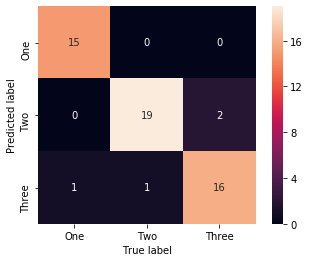

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

mat=confusion_matrix(Y_test, predicciones)
Matrizconf=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
           xticklabels=labels, yticklabels= labels)

plt.xlabel('True label')
plt.ylabel('Predicted label')

In [13]:
print(classification_report(Y_test, predicciones))

              precision    recall  f1-score   support

         One       1.00      0.94      0.97        16
       Three       0.90      0.95      0.93        20
         Two       0.89      0.89      0.89        18

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54

